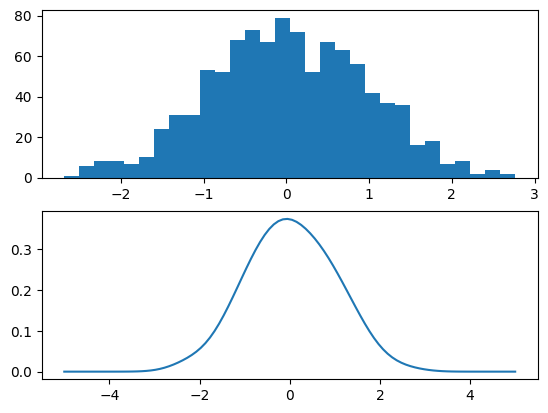

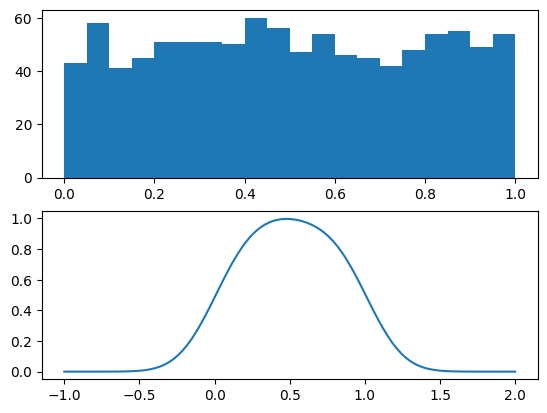

In [82]:
#1.3 General Preparation
import numpy as np
import matplotlib.pyplot as plt

def ksdensity(data, width=0.3):
  """Returns kernel smoothing function from data points in data"""
  def ksd(x_axis):
    def n_pdf(x, mu=0., sigma=1.): # normal pdf
      u = (x - mu) / abs(sigma)
      y = (1 / (np.sqrt(2 * np.pi) * abs(sigma)))
      y *= np.exp(-u * u / 2)
      return y
    prob = [n_pdf(x_i, data, width) for x_i in x_axis] # sets prob equal to a list of y values dependent on x_axis input -
    #essentially plotting the gaussian density
    pdf = [np.average(pr) for pr in prob] #each row is one x value
    return np.array(pdf)
  return ksd

#Plot normal distribution
fig, ax = plt.subplots(2)
x = np.random.randn(1000)
ax[0].hist(x, bins=30) #number of bins

ks_density = ksdensity(x, width=0.4)
x_values = np.linspace(-5., 5., 100)
ax[1].plot(x_values, ks_density(x_values))

#Plot uniform distribution
fig2, ax2 = plt.subplots(2)
x = np.random.rand(1000)
ax2[0].hist(x, bins=20)

ks_density = ksdensity(x, width=0.2)
x_values = np.linspace(-1., 2., 100)
ax2[1].plot(x_values, ks_density(x_values))

plt.show()


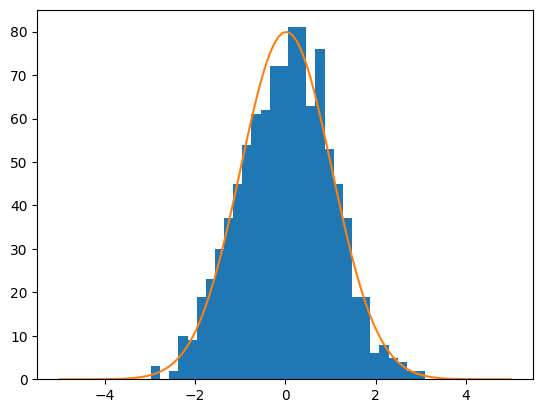

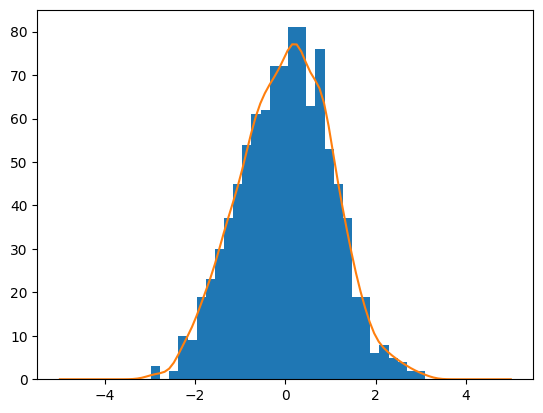

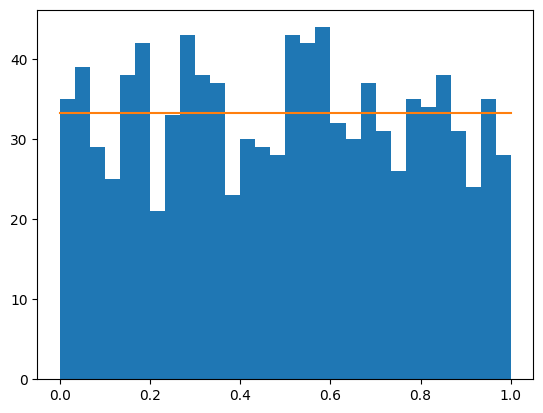

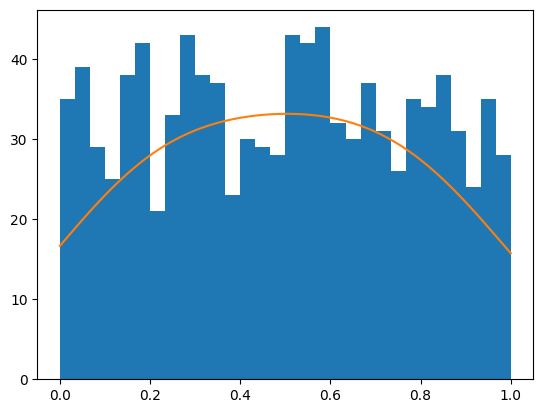

In [83]:
#Part 2.1


#Plotting histograms for Gaussian variable and calculating the mean and variance
#fig, ax = plt.subplots(4)
gaussian_vector = np.random.randn(1000)
gaussian_vector_average = np.mean(gaussian_vector)
gaussian_vector_variance = np.var(gaussian_vector)
f_j = plt.hist(gaussian_vector, bins=30) #number of bins

#Finding the scale factor for the pdf overlay
n_j = f_j[0]
range = f_j[1]
bin_width = range[5] - range[4]
area = 0
for j in n_j:
  area += j * bin_width

#Plotting the gaussian overlay
x_values = np.linspace(-5., 5., 100)
gaussian_pdf_values = area / (np.sqrt(2 * np.pi * gaussian_vector_variance)) * np.exp(-1*((x_values - gaussian_vector_average)/np.sqrt(gaussian_vector_variance))**2 / 2)
plt.plot(x_values, gaussian_pdf_values)
plt.show()


#Plotting histogram with kernel smoothing overlayed
plt.hist(gaussian_vector, bins=30)
x_values = np.linspace(-5., 5., 100)
ks_density = ksdensity(gaussian_vector, width=0.2)
plt.plot(x_values, area*ks_density(x_values))

plt.show()

#Uniform random variable
uniform_vector = np.random.rand(1000)
f_j = plt.hist(uniform_vector, bins=30)

#Finding the scale factor for the pdf overlay
n_j = f_j[0]
range = f_j[1]
bin_width = range[5] - range[4]
area = 0
for j in n_j:
  area += j * bin_width

#Plotting the uniform overlay
x_values = np.linspace(0., 1., 100)
uniform_pdf_values = np.linspace(area, area, 100)
plt.plot(x_values, uniform_pdf_values)
plt.show()

#Plotting histogram with kernel smoothing overlayed
plt.hist(uniform_vector, bins=30)
x_values = np.linspace(0., 1., 100)
ks_density = ksdensity(uniform_vector, width=0.2)
plt.plot(x_values, 33*ks_density(x_values))
plt.show()




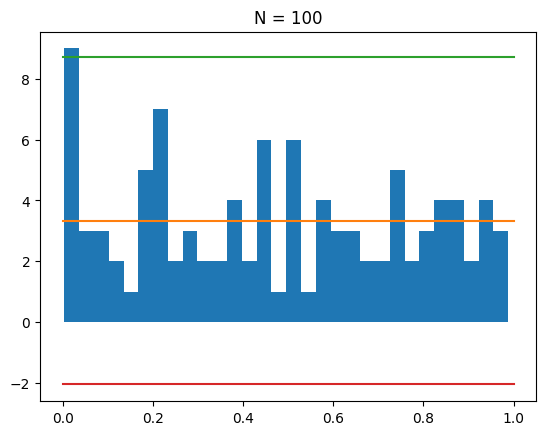

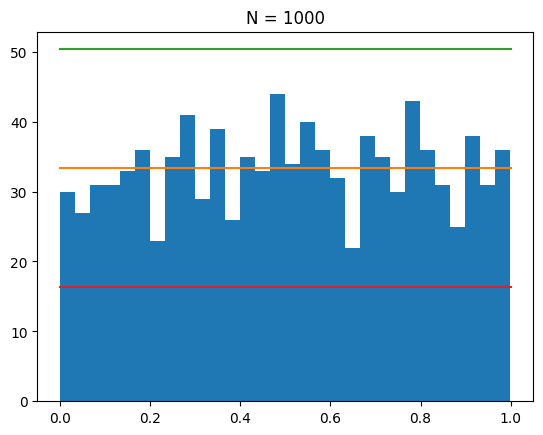

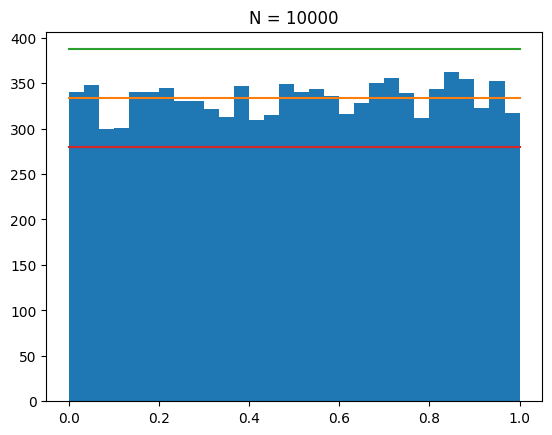

In [84]:
#Second part of section 2.1
#The probability that a sample lies within a particular bin is 1/30 for every bin
#The number within each bin is found below
N=100
p_j = 1/30
#Using the multinomial theory
mean_of_count_data = N * p_j
sd_of_count_data = np.sqrt(N * p_j * (1 - p_j))
mean_line = np.linspace(mean_of_count_data, mean_of_count_data, 100)
sd1_line = np.linspace(mean_of_count_data + 3*sd_of_count_data, mean_of_count_data +3*sd_of_count_data, 100)
sd2_line = np.linspace(mean_of_count_data - 3*sd_of_count_data, mean_of_count_data - 3*sd_of_count_data, 100)
uniform_vector = np.random.rand(N)
plt.hist(uniform_vector, bins=30)
plt.plot(x_values, mean_line)
plt.plot(x_values, sd1_line)
plt.plot(x_values, sd2_line)
plt.title("N = 100")
plt.show()

N=1000
p_j = 1/30
#Using the multinomial theory
mean_of_count_data = N * p_j
sd_of_count_data = np.sqrt(N * p_j * (1 - p_j))
mean_line = np.linspace(mean_of_count_data, mean_of_count_data, 100)
sd1_line = np.linspace(mean_of_count_data + 3*sd_of_count_data, mean_of_count_data +3*sd_of_count_data, 100)
sd2_line = np.linspace(mean_of_count_data - 3*sd_of_count_data, mean_of_count_data - 3*sd_of_count_data, 100)
uniform_vector = np.random.rand(N)
plt.hist(uniform_vector, bins=30)
plt.plot(x_values, mean_line)
plt.plot(x_values, sd1_line)
plt.plot(x_values, sd2_line)
plt.title("N = 1000")
plt.show()

N=10000
p_j = 1/30
#Using the multinomial theory
mean_of_count_data = N * p_j
sd_of_count_data = np.sqrt(N * p_j * (1 - p_j))
mean_line = np.linspace(mean_of_count_data, mean_of_count_data, 100)
sd1_line = np.linspace(mean_of_count_data + 3*sd_of_count_data, mean_of_count_data +3*sd_of_count_data, 100)
sd2_line = np.linspace(mean_of_count_data - 3*sd_of_count_data, mean_of_count_data - 3*sd_of_count_data, 100)
uniform_vector = np.random.rand(N)
plt.hist(uniform_vector, bins=30)
plt.plot(x_values, mean_line)
plt.plot(x_values, sd1_line)
plt.plot(x_values, sd2_line)
plt.title("N = 10000")
plt.show()

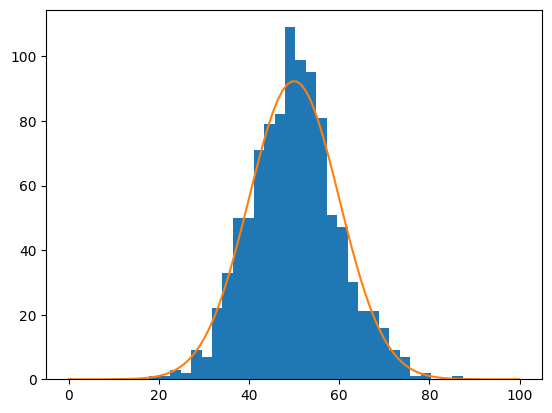

<ipython-input-85-1e0932d68856>:44: RuntimeWarning: divide by zero encountered in divide
  x_squared_pdf_values = area / (np.sqrt(2*np.pi*x_values)) * np.exp(-0.5 * x_values)


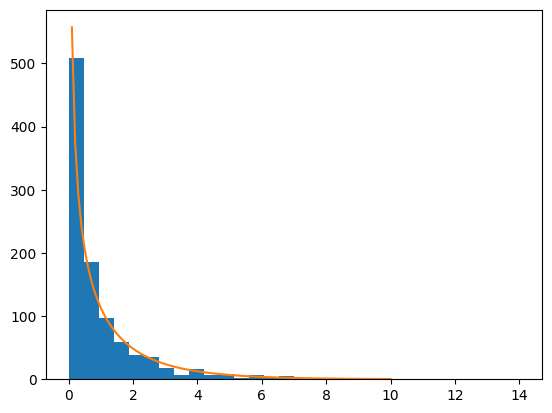

In [85]:
#Part 2.2

#y = ax + b
a = 10
b = 50
x = np.random.randn(1000)
y = a*x + b

#Histogram from direct transformation of samples
f_j = plt.hist(y, bins=30) #number of bins

#Calculating scale factor
n_j = f_j[0]
range = f_j[1]
bin_width = range[5] - range[4]
area = 0
for j in n_j:
  area += j * bin_width

#Overlaying plot found from Jacobian
x_values = np.linspace(0., 100., 100)
gaussian_pdf_values = area / (np.sqrt(2*np.pi*a**2)) * np.exp(-1 / (2*a**2) * (x_values - b)**2)
plt.plot(x_values, gaussian_pdf_values)

plt.show()

#y = x**2
x = np.random.randn(1000)
y = x**2

#Histogram from direct transformation of samples
f_j = plt.hist(y, bins=30)

#Calculating scale factor
n_j = f_j[0]
range = f_j[1]
bin_width = range[5] - range[4]
area = 0
for j in n_j:
  area += j * bin_width

#Overlaying plot found from Jacobian
x_values = np.linspace(0., 10., 100)
x_squared_pdf_values = area / (np.sqrt(2*np.pi*x_values)) * np.exp(-0.5 * x_values)
plt.plot(x_values, x_squared_pdf_values)

plt.show()



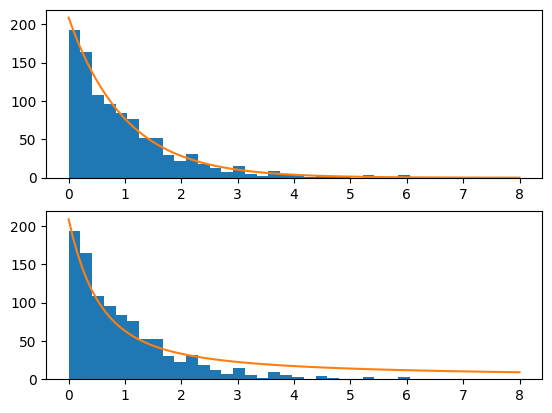

In [86]:
#Part 2.3

#Generating exponential density from inverse CDF method
x = np.random.rand(1000)
y = -1 * np.log(1 - x)

#Histogram from direct transformation of samples
fig, ax = plt.subplots(2)
f_j = ax[0].hist(y, bins=30) #number of bins

#Calculating scale factor
n_j = f_j[0]
range = f_j[1]
bin_width = range[5] - range[4]
area = 0
for j in n_j:
  area += j * bin_width

#Overlaying plot found from Jacobian
x_values = np.linspace(0., 8., 100)
exponential_pdf_values = area * np.exp(-1*x_values)
ax[0].plot(x_values, exponential_pdf_values)

#Exponential Kernel Density Function
def ksdensity(data, width=0.3):
  """Returns kernel smoothing function from data points in data"""
  def ksd(x_axis):
    def e_pdf(x, l=1., sf=1.): # normal pdf
      y=np.exp(-l * sf * x)
      return y
    prob = [e_pdf(x_i, data, width) for x_i in x_axis] # sets prob equal to a list of y values dependent on x_axis input -
    #essentially plotting the exponential density
    pdf = [np.average(pr) for pr in prob] #each row is one x value
    return np.array(pdf)
  return ksd

#Plotting histogram with kernel smoothing overlayed
ax[1].hist(y, bins=30) #number of bins
ks_density = ksdensity(x_values, width=0.4)
x_values = np.linspace(0., 8., 100)
ax[1].plot(x_values, area*ks_density(x_values))

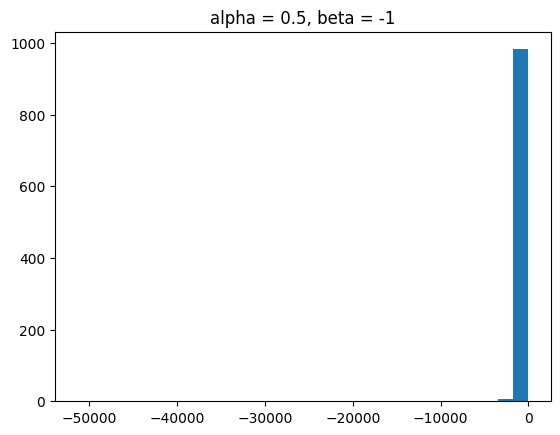

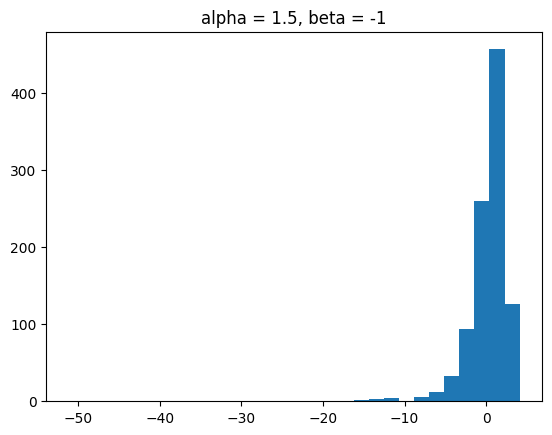

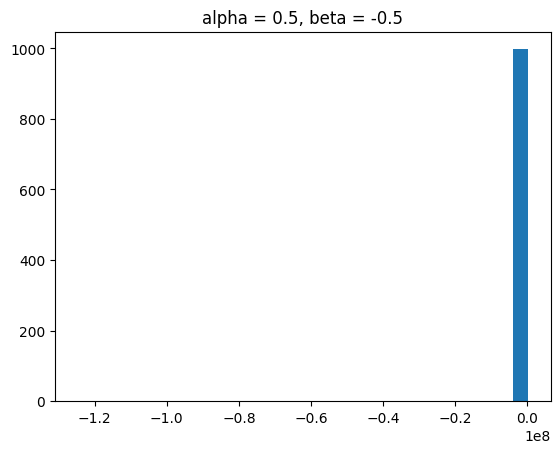

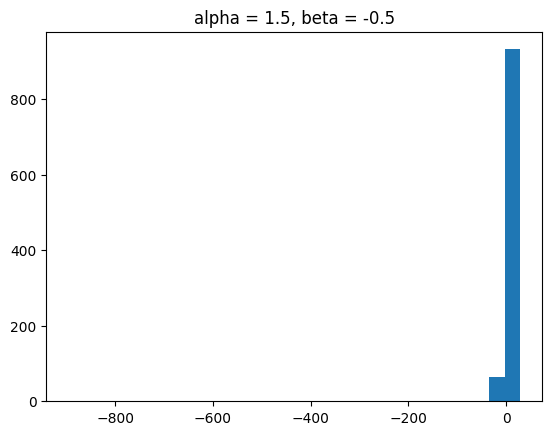

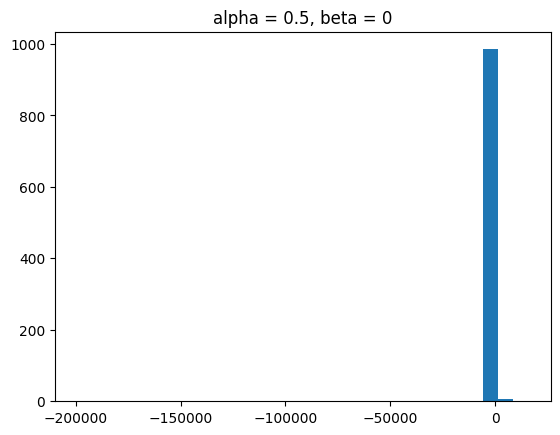

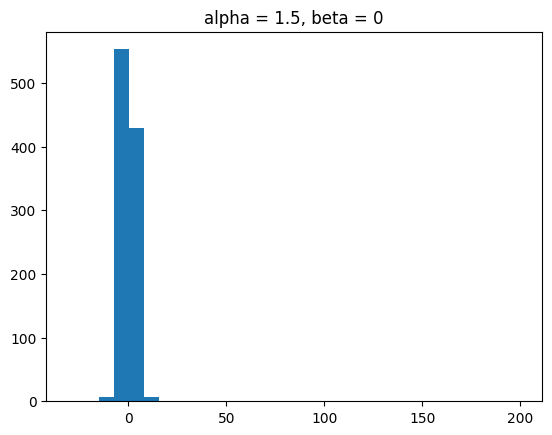

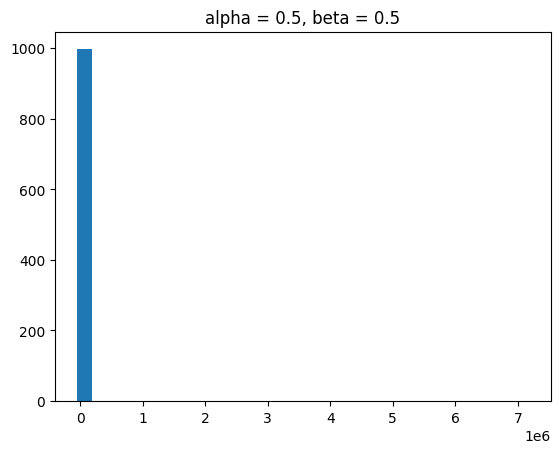

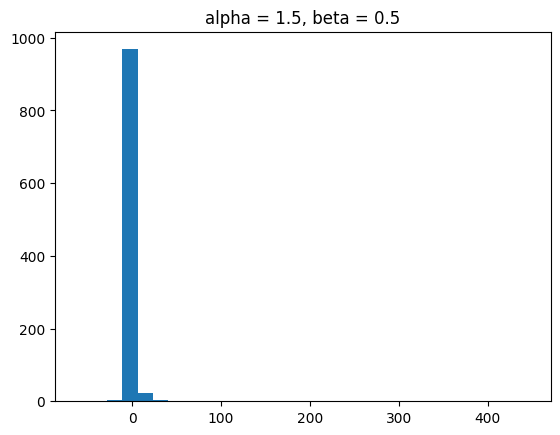

In [87]:
#Part 2.4

def x(alpha, beta):
  #Choosing parameters and calculating constants
  b = 1 / alpha * np.arctan(beta * np.tan(np.pi * alpha / 2))
  s = (1 + beta ** 2 * (np.tan(np.pi * alpha / 2))**2) ** (1 / (2* alpha))

  #Generating uniform random variable
  u = np.random.uniform(-np.pi / 2, np.pi / 2, 1000)

  #Generating exponetial random variable with mean 1
  e = np.random.exponential(1, 1000)

  #Generating random variable X
  x_random_variable = s * (np.sin(alpha*(u + b))) / ((np.cos(u))**(1 / alpha))*((np.cos(u - alpha*(u + b)))/(e))**((1 - alpha) / alpha)

  return x_random_variable

#Histogram density alpha = 0.5, beta = -1
plt.hist(x(0.5, -1), bins=30) #number of bins
plt.title("alpha = 0.5, beta = -1")
plt.show()

#Histogram density alpha = 1.5, beta = -1
plt.hist(x(1.5, -1), bins=30) #number of bins
plt.title("alpha = 1.5, beta = -1")
plt.show()

#Histogram density alpha = 0.5, beta = -0.5
plt.hist(x(0.5, -0.5), bins=30) #number of bins
plt.title("alpha = 0.5, beta = -0.5")
plt.show()

#Histogram density alpha = 1.5, beta = -0.5
plt.hist(x(1.5, -0.5), bins=30) #number of bins
plt.title("alpha = 1.5, beta = -0.5")
plt.show()

#Histogram density alpha = 0.5, beta = 0
plt.hist(x(0.5, 0), bins=30) #number of bins
plt.title("alpha = 0.5, beta = 0")
plt.show()

#Histogram density alpha = 1.5, beta = 0
plt.hist(x(1.5, 0), bins=30) #number of bins
plt.title("alpha = 1.5, beta = 0")
plt.show()

#Histogram density alpha = 0.5, beta = 0.5
plt.hist(x(0.5, 0.5), bins=30) #number of bins
plt.title("alpha = 0.5, beta = 0.5")
plt.show()

#Histogram density alpha = 1.5, beta = 0.5
plt.hist(x(1.5, 0.5), bins=30) #number of bins
plt.title("alpha = 1.5, beta = 0.5")
plt.show()

